In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-14 21:12:22.282391: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:12:22.361231: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:12:22.362309: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 21:12:24.087730: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/train/train-static.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'k': 9, 'l': 10, 'm': 11, 'n': 12, 'o': 13, 'p': 14, 'q': 15, 'r': 16, 's': 17, 't': 18, 'u': 19, 'v': 20, 'w': 21, 'x': 22, 'y': 23}
(720000, 11) (720000, 24)
(4800, 150, 11) (4800, 150, 24)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3600, 150, 11) (1200, 150, 11)
(3600, 150, 24) (1200, 150, 24)


In [4]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20


2023-03-14 21:12:29.645066: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23760000 exceeds 10% of free system memory.
2023-03-14 21:12:29.664836: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51840000 exceeds 10% of free system memory.
2023-03-14 21:12:30.347409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:12:30.350858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{

113/113 [==============================] - ETA: 0s - loss: 2.4480 - accuracy: 0.3446

2023-03-14 21:12:43.945439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:12:43.958047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:12:43.960778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

113/113 [==============================] - 16s 112ms/step - loss: 2.4480 - accuracy: 0.3446 - val_loss: 1.8047 - val_accuracy: 0.5782
Epoch 2/20
113/113 [==============================] - 15s 136ms/step - loss: 1.4742 - accuracy: 0.6401 - val_loss: 1.2363 - val_accuracy: 0.6690
Epoch 3/20
113/113 [==============================] - 21s 187ms/step - loss: 1.0657 - accuracy: 0.7302 - val_loss: 0.9424 - val_accuracy: 0.7503
Epoch 4/20
113/113 [==============================] - 22s 197ms/step - loss: 0.8405 - accuracy: 0.7706 - val_loss: 0.7632 - val_accuracy: 0.7781
Epoch 5/20
113/113 [==============================] - 25s 225ms/step - loss: 0.7060 - accuracy: 0.7957 - val_loss: 0.6522 - val_accuracy: 0.8018
Epoch 6/20
113/113 [==============================] - 28s 248ms/step - loss: 0.6170 - accuracy: 0.8093 - val_loss: 0.5938 - val_accuracy: 0.8096
Epoch 7/20
113/113 [==============================] - 28s 252ms/step - loss: 0.5596 - accuracy: 0.8245 - val_loss: 0.5399 - val_accuracy: 0.8

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 64)           19456     
                                                                 
 dense (Dense)               (None, 150, 24)           1560      
                                                                 
Total params: 21,016
Trainable params: 21,016
Non-trainable params: 0
_________________________________________________________________


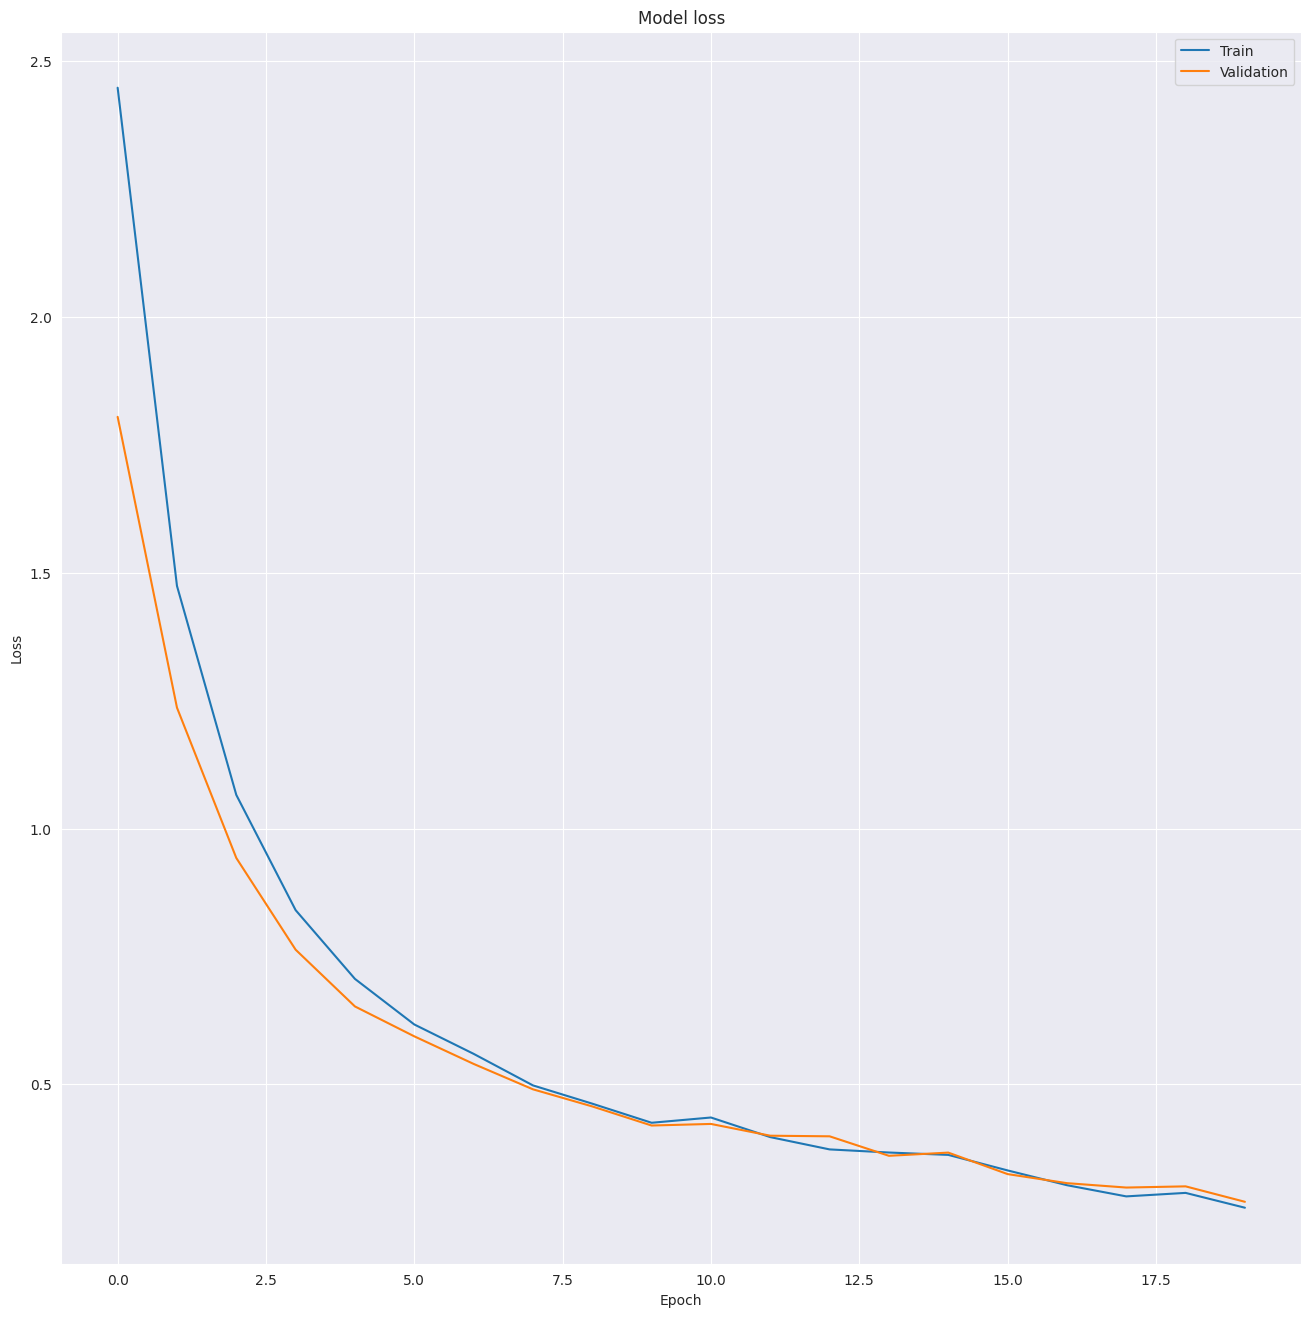

In [6]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

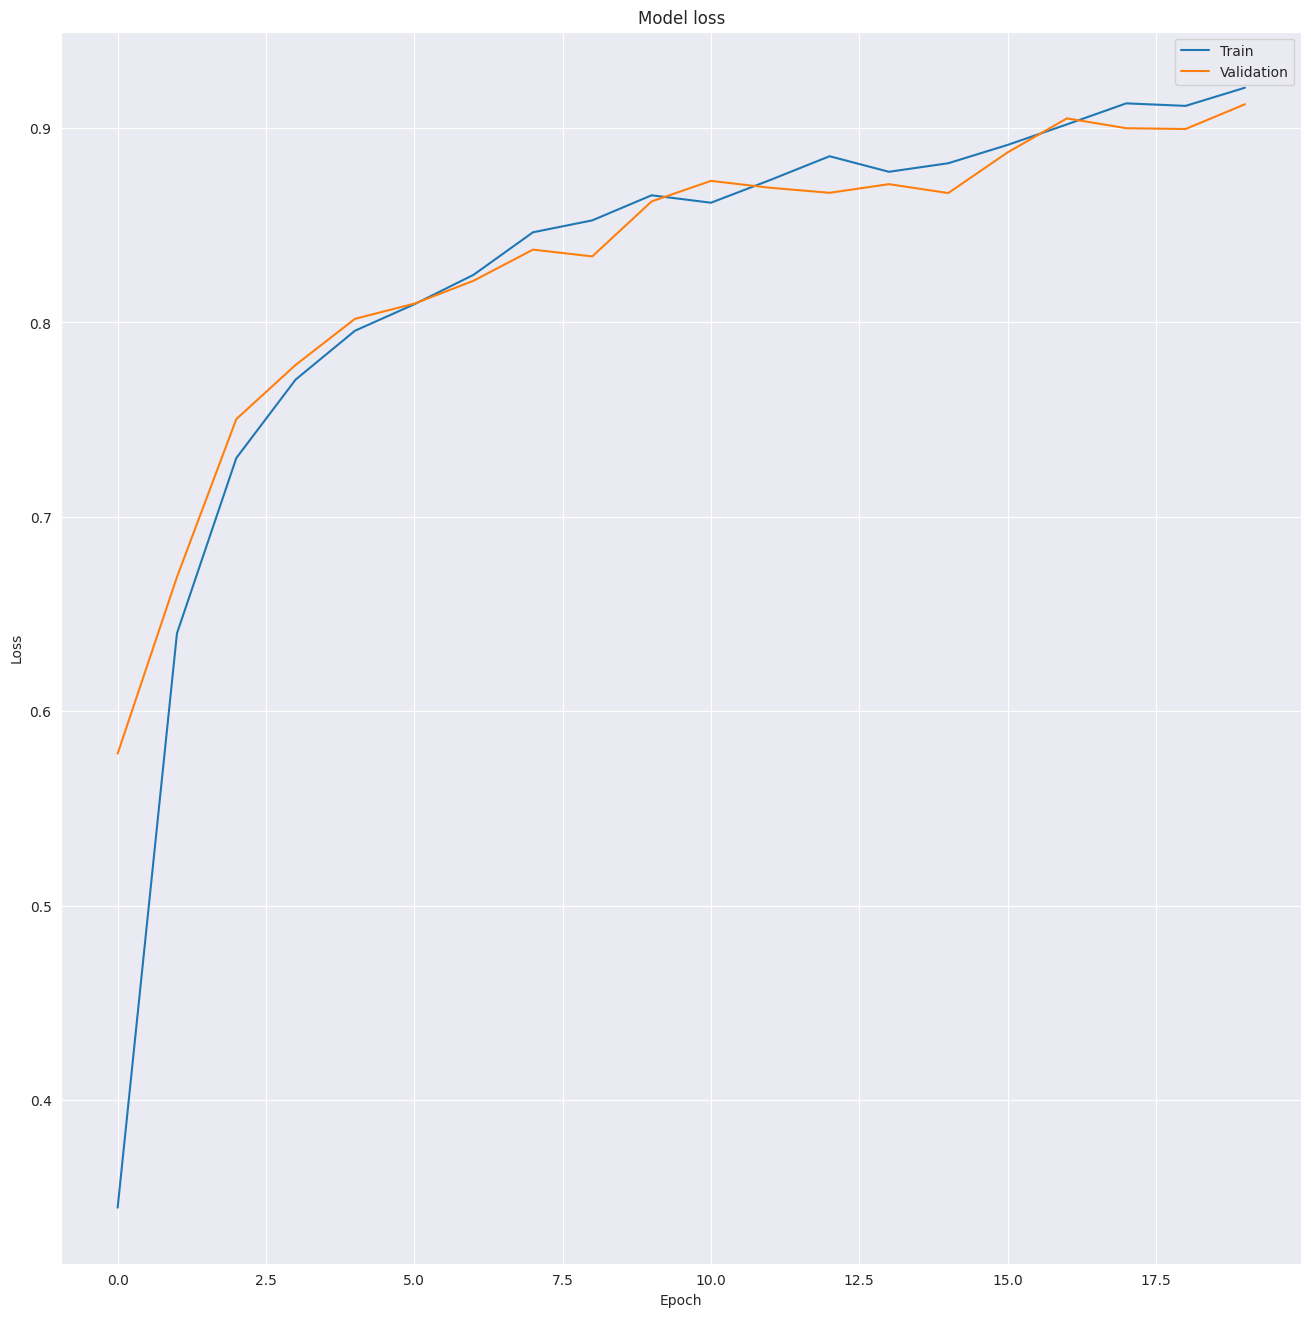

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
model.save('../models/static.h5')